### Sistemas de ecuaciones diferencial
- Herrera Monteza Jherson Miguel
- Física computacional. Universidad Nacional de Trujillo

In [5]:
#Importamos las librerias
from matplotlib import pyplot as plt #Libreria para graficar, muy similar al matlab
import numpy as np # Libreria para trabajar con matrices y algunas expresiones matematicas
import pandas as pd # Libreria para trabajar con dataframes
import scipy as sp # Libreria para trabajar con funciones matematicas
from matplotlib import style # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) # Estilo de graficos

In [6]:
# Condiciones iniciales
xo = 5
y0 = 0
dt = 0.1
tiempo = np.arange(0, 18+dt, dt)

In [7]:
x = [xo]
y = [y0]

In [8]:
def funcion_f(x, y, t):
    u = y
    v = -x + np.cos(t)
    return u, v # Retorna los valores

In [9]:
for i in range(len(tiempo)):
    x_derivada, y_derivada = funcion_f(x[i], y[i], tiempo[i])
    x.append(x[i]+x_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista
    y.append(y[i]+y_derivada*dt)
    
print(len(x))

182


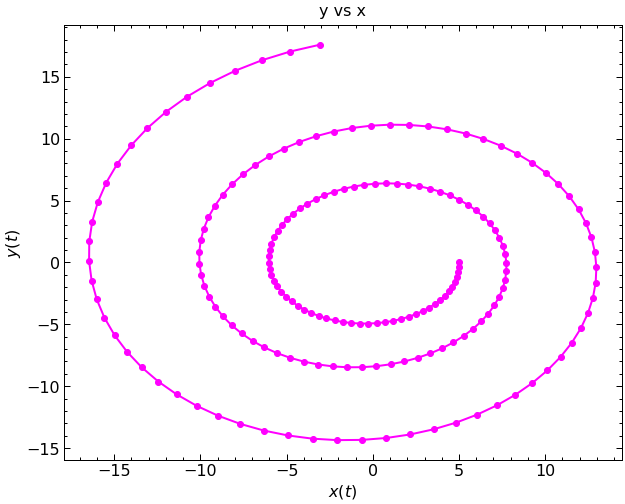

In [10]:
ax = plt.figure(figsize=(10,8))
plt.title('y vs x', pad = 10)
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$x(t)$')
plt.plot(x, y, 'o-', color = 'magenta')


Text(0.5, 0, '$t\\ [s]$')

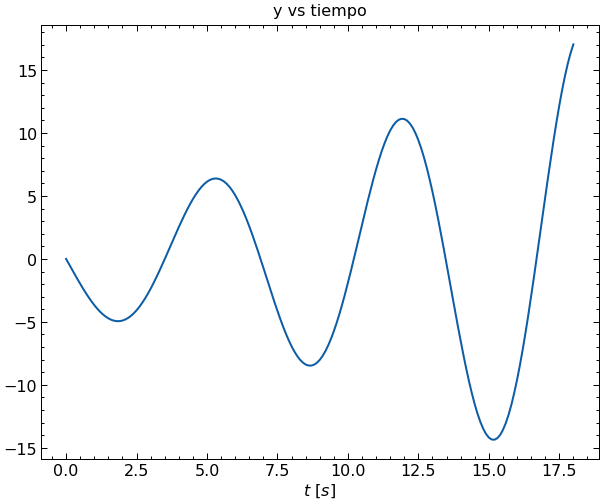

In [11]:
ay = plt.figure(figsize=(10,8))
plt.title('y vs tiempo', pad = 10)
plt.plot(tiempo, y[:len(tiempo)], '-')
plt.xlabel(r'$t\ [s]$')

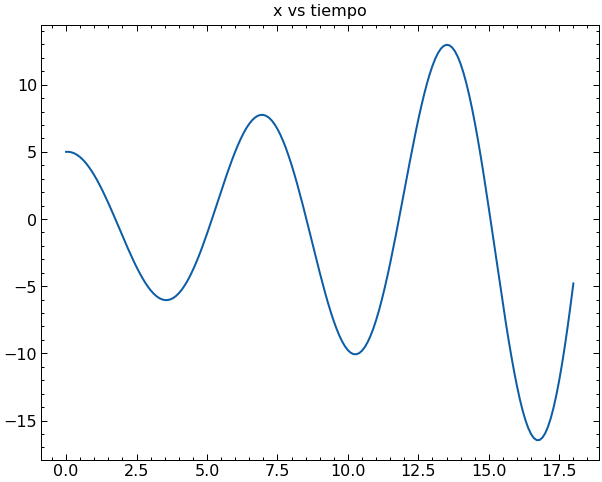

In [12]:
aex = plt.figure(figsize=(10,8))
plt.title('x vs tiempo', pad = 10)
plt.plot(tiempo, x[:len(tiempo)], '-')

### Atractor de Lorenz
El famoso *sistema de Lorenz* de ecuaciones diferenciales está dado por:

\begin{equation} 
\begin{split}
\frac{dx}{dt} & = - \sigma x + \sigma y \\
\frac{dy}{dt} & = \rho x - y - xz \\
\frac{dz}{dt} & = -\beta z + xy
\end{split}
\end{equation}


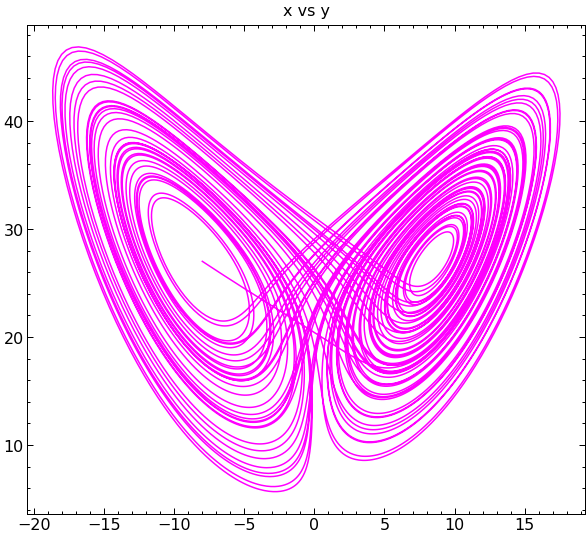

In [13]:
# Definimos los parámetros de la ecuación
sigma = 10     # Valor de sigma
rho   = 28     # Valor de rho
beta  = 8./3.  # Valor de beta
# Función que devuelve un punto del sistema de ecuaciones diferenciales toma como argumentos los valores de x, y, z 
# y devuelve un punto del sistema, correpondiente a dx/dt, dy/dt, dz/dt, representados con u, v y w
def lorenz(x, y, z):
    u = -sigma*x+sigma*y
    v = rho*x-y-x*z
    w = -beta*z+x*y
    return u, v, w
# Condiciones iniciales o punto de partida
xo = -8
yo = 8
zo = 27
# Se crea tres listas para guardar todos los valores de la solución aproximada del sistema
# su valor inicial es el punto de partida
xs = [xo]
ys = [yo]
zs = [zo]
# Se crea una paso de tiempo dt y yna lista para guardar todos los valores de tiempo
dt = 0.005
tiempo = np.arange(0,60+dt,dt)
# Bucle para ir llenando las soluciones de x, y, z, utilizando el método de Euler
for i in range(len(tiempo)):
    x_derivada, y_derivada, z_derivada = lorenz(xs[i], ys[i], zs[i]) # Se evalua la función de Lorenz en cada iteración
    xs.append(xs[i]+x_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista xs
    ys.append(ys[i]+y_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista ys
    zs.append(zs[i]+z_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista zs    
# Graficamos las listas obtenidas    
ax = plt.figure(figsize=(10,9))
plt.plot(xs, zs , '-', linewidth = 1.5, color = 'magenta')
plt.title('x vs y', pad = 10)
plt.savefig('x_vs_y.eps')

### Sistema depredador presa
El sistema de ecuaciones diferenciales de la *presa* y *depredador* es:
\begin{equation} 
\begin{split}
\frac{dR}{dt} & = - \left( 1-\frac{R}{3} \right)R-RF \\
\frac{dF}{dt} & = -2F + 4RF
\end{split}
\end{equation}


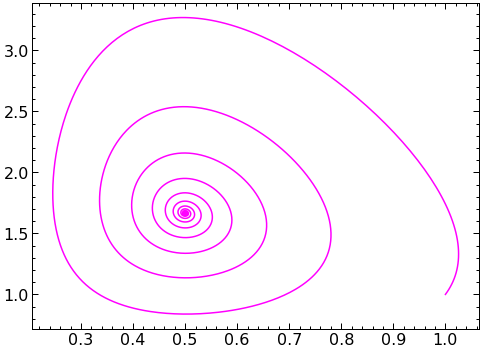

In [14]:
# Definimos la fnción del sistema depredador-presa
def depredador_presa(R, F, t):
    dRdt = 2*(1-R/3)*R-R*F
    dFtd = -2*F+4*R*F
    return dRdt, dFtd
# Condiciones iniciales o punto de partida
Ro = 1 # Numero inicial de presas
Fo = 1 # Numero inicial de depredadores
# Listas para guardar todos los valores de la solución aproximada del sistema
F = [Fo] # Lista de numero de depredadores
R = [Ro] # Lista de numero de presas
# Se crea una paso de tiempo dt y una lista para guardar todos los valores de tiempo
dt = 0.01
tiempo = np.arange(0,50+dt,dt)
# Se llenan las listas con los valores de la solución aproximada
for i in range(len(tiempo)):
    dRdt, dFdt = depredador_presa(R[i], F[i], tiempo[i])
    R.append(R[i]+dRdt*dt)
    F.append(F[i]+dFdt*dt)
# Graficamos las listas obtenidas
plt.plot(R, F, '-', linewidth = 1.5, color = 'magenta')


### Considere el sistema depredador-presa:
Se tiende el sistema:
\begin{equation} 
\begin{split}
\frac{dR}{dt} & = - 2R \left( 1-\frac{R}{2.5} \right)-1.5RF\\
\frac{dF}{dt} & = -F + 0.8RF
\end{split}
\end{equation}


In [15]:
def euler_depredador_presa(funcion, Ro, Fo):
    R = [Ro]
    F = [Fo]
    dt = 0.01
    tiempo = np.arange(0,100+dt,dt)
    for i in range(len(tiempo)):
        dRdt, dFdt = funcion(R[i], F[i])
        R.append(R[i]+dRdt*dt)
        F.append(F[i]+dFdt*dt)
    return R, F

In [16]:
def f (R, F):
    dRdt = 2*R*(1-R/2.5)-1.5*R*F
    dFdt = -F+0.8*R*F
    return dRdt, dFdt

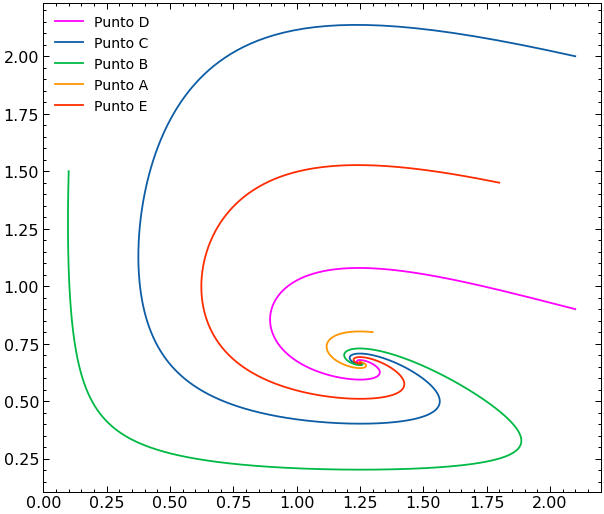

In [17]:
# Punto D
Rd, Fd = euler_depredador_presa(f, 2.1, 0.9)
# Punto C
Rc, Fc = euler_depredador_presa(f, 2.1, 2)
# Punto B
Rb, Fb = euler_depredador_presa(f, 0.1, 1.5)
# Punto A
Ra, Fa = euler_depredador_presa(f, 1.3, 0.8)
# punto E
Re, Fe = euler_depredador_presa(f, 1.8, 1.45)
ax = plt.figure(figsize=(10,9))
plt.plot(Rd, Fd, '-', linewidth = 1.8, color = 'magenta', label = 'Punto D')
plt.plot(Rc, Fc, '-', linewidth = 1.8, label = 'Punto C')
plt.plot(Rb, Fb, '-', linewidth = 1.8, label = 'Punto B')
plt.plot(Ra, Fa, '-', linewidth = 1.8, label = 'Punto A')
plt.plot(Re, Fe, '-', linewidth = 1.8, label = 'Punto E')
plt.legend(loc = 'upper left', fontsize = '14')

### El modelo de Duffing está dado por:
$$ \frac{d^2x}{dt^2} + g \frac{dx}{dt} + x^3 = b \cos(t) $$
Escribir un programa para resolver el modelo de Duffing en una región paramétrica diferente de $(g, b)$. Discuta el comportamiento del sistema a partir del diagrama de fase de $(x, v)$, donde $v = dx/dt$. ¿Existe una región paramétrica en la cual el sistema es caótico?

Reescribimos para obtener una ecuación de la forma:
$$ \frac{d^2x}{dt^2} = f(x, \frac{dx}{dt}, t) $$


Del dato: $$ v = \frac{dx}{dt} $$
es decir:
$$ v_{n} = \frac{x_{n+1}-x_{n}}{\Delta t} $$
de lo que resulta:
$$ x_{n+1} = x_{n} + v_{n} \Delta t $$

La derivada de primer orden de $y$ es la derivada de segundo orden de $x$:
$$ \frac{dv}{dt} = f\left(x, \frac{dx}{dt}, t\right) $$

se tiene una ecuación para iterar:
$$ \frac{v_{n+1}-v_{n}}{\Delta t} = f\left(x, \frac{dx}{dt}, t\right) $$

Tras despejar se obtiene:
$$ v_{n+1} = v_{n} + f(x_{n}, v_{n}, t_{n})\Delta t $$


#### En el problema
se obtiene:
$$ \frac{d^2x}{dt^2} = b \cos(t) - g \frac{dx}{dt} - x^3 $$

In [18]:
b = 0
g = 0
def Fduffing(x, v, t):
    w = b*np.cos(t)-g*v-x**3
    return w

In [19]:
#tiempo
dt = 0.01
tmpo = np.arange(0,80+dt,dt)

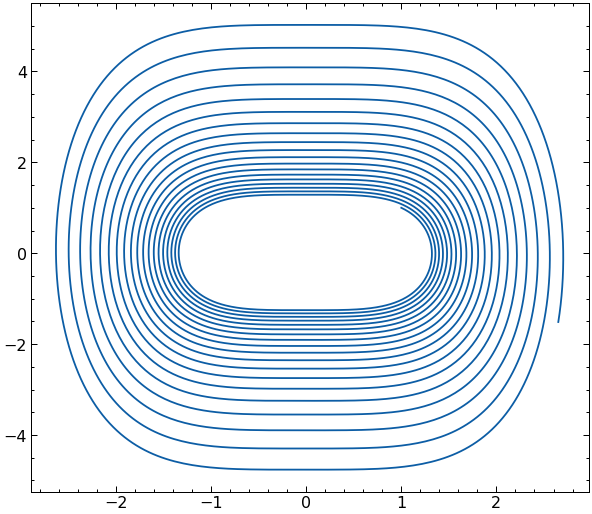

In [20]:
vo = 1
xo = 1
v = [vo]
x = [xo]

for i in range(len(tmpo)):
    x.append(v[i]*dt + x[i]) 
    v.append(Fduffing(x[i], v[i], tmpo[i])*dt + v[i])

ax = plt.figure(figsize=(10,9))
plt.plot(x, v, '-', linewidth = 1.8)

In [76]:
def eulerDuffing(xo, vo, b, g, x = None, v = None):
    if x is None:
        x = [xo]
    if v is None:
        v = [vo]
    funcion = lambda x, v, t: b*np.cos(t)-g*v-x**3
    dt = 0.01
    tiempo = np.arange(0,100+dt,dt)
    for i in range(len(tiempo)):
        x.append(v[i]*dt + x[i]) 
        v.append(funcion(x[i], v[i], tiempo[i])*dt + v[i])
    ax = plt.figure(figsize=(10,9))
    plt.plot(x, v, '-', linewidth = 1.8)
    return x, v


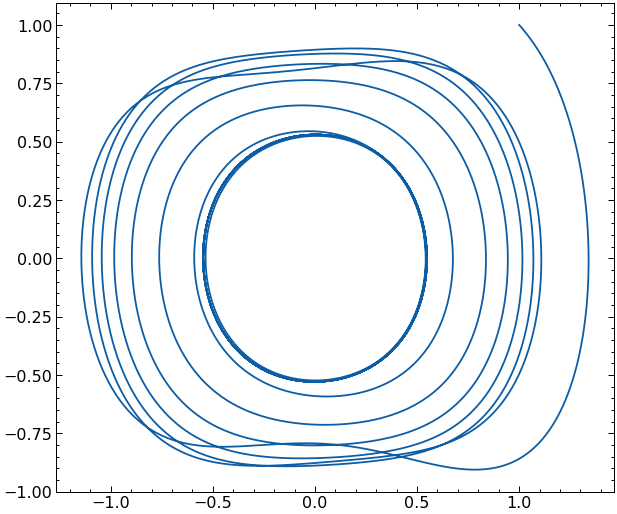

In [77]:
X, V = eulerDuffing(1, 1, 0.5, 0.5)

10002


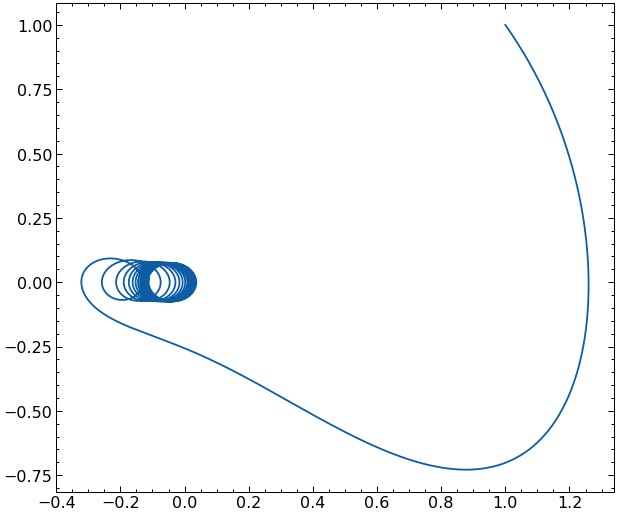

In [80]:
Xa, Va = eulerDuffing(1, 1, 0.1, 0.9)
print(len(Xa))

10002


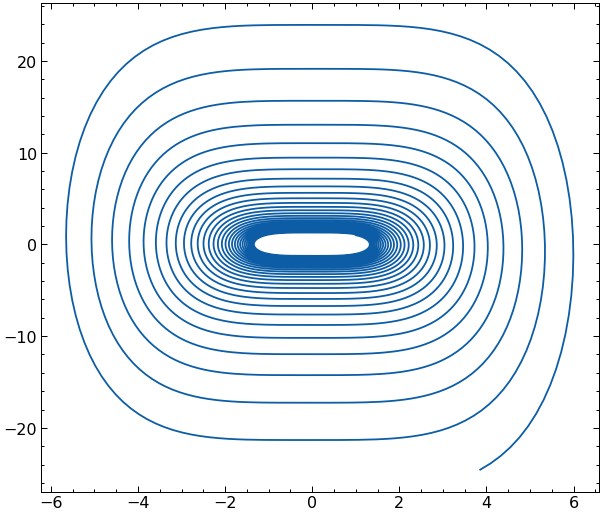

In [82]:
Xa, Va = eulerDuffing(1, 1, 0, 0)
print(len(Xa))

10002


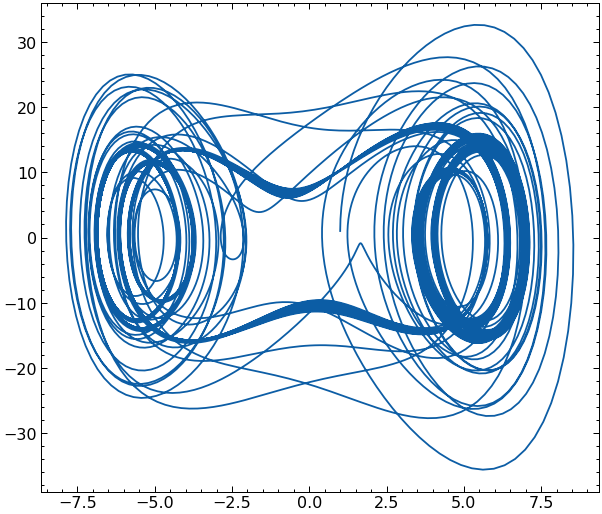

In [85]:
Xa, Va = eulerDuffing(1, 1, 185, 1)
print(len(Xa))